In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AY0e-g7z5odgH0M8BH6dmNjeQ9CrA_CE9UQ6MXURR6PHxUgkWZGYZcidGkg
Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from math import sqrt
import matplotlib.pyplot as plt
from sklearn import metrics
import sklearn
import h5py

In [3]:
folder_path = "drive/MyDrive/SIT764/Property/data/"
property_data = pd.read_csv(folder_path + 'cleaning_data.csv')
property_data

,Suburb,Suburb_Code,Land Size SQM,Building Size SQM,Bedrooms,Toilets,Car,School,Shop,Restaurant,Station,Park,Hospital,Rent Amount PW,Auction,Last Sell Date,Last Sell Price,Sell Date,Sell Price
0,Armstrong Creek,1,539.0,176.000000,4.0,2.0,2.0,4,17,6,17,4,0,390.000000,0.0,2000-02-01,175000.0,2021-03-01,610000
1,Armstrong Creek,1,446.0,157.800253,4.0,2.0,2.0,5,9,7,14,3,0,800.847867,0.0,2019-04-01,545000.0,2021-03-01,645000
2,Armstrong Creek,1,398.0,161.000000,4.0,2.0,2.0,2,3,4,14,4,0,400.000000,0.0,2018-10-01,550000.0,2021-03-01,597500
3,Armstrong Creek,1,630.0,157.800253,4.0,2.0,4.0,2,4,4,14,3,0,800.847867,0.0,2014-03-01,207000.0,2021-03-01,841000
4,Armstrong Creek,1,449.0,170.000000,4.0,2.0,2.0,1,2,4,12,3,0,800.847867,0.0,2017-07-01,475000.0,2021-03-01,640000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10938,Whittington,31,1405.0,157.800253,3.0,1.0,1.0,15,20,16,20,5,16,800.847867,0.0,2003-07-01,150000.0,2016-07-01,600000
10939,Whittington,31,581.0,157.800253,4.0,2.0,4.0,14,20,16,20,5,16,800.847867,0.0,2004-02-01,230000.0,2016-07-01,375000
10940,Whittington,31,645.0,122.000000,3.0,1.0,1.0,14,20,17,20,5,16,350.000000,0.0,2002-12-01,178000.0,2016-06-01,300000
10941,Whittington,31,774.0,157.800253,3.0,1.0,4.0,11,20,20,20,1,13,290.000000,0.0,2009-11-01,143000.0,2016-06-01,255000


# Pre-Processing Data

In [4]:
#select Suburb, Land Size SQM, Building Size SQM, Bedrooms, Toilets, Car, "School, Shop, Station, Park, Hospital, Rent Amount PW, Auction, Last Sell Price as the input feature
columns = ["Suburb", "Land Size SQM", "Building Size SQM", "Bedrooms", "Toilets", "Car", "School", "Shop", "Station", "Park", "Hospital", "Rent Amount PW", "Auction", "Last Sell Price"]
X = property_data[columns]
#Select the columns Sell Price as the target
y = property_data["Sell Price"]


We will delete the outlier points by using Interquartile Range Method

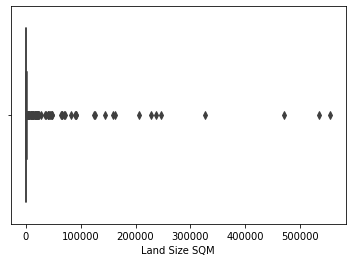

In [5]:
import seaborn as sns
sns.boxplot(x=X["Land Size SQM"])

In [6]:
Q1 = X["Land Size SQM"].quantile(0.25)
Q3 = X["Land Size SQM"].quantile(0.75)
IQR = Q3 - Q1

In [7]:
X = X[X["Land Size SQM"] <= (Q3 + 1.5 * IQR)]

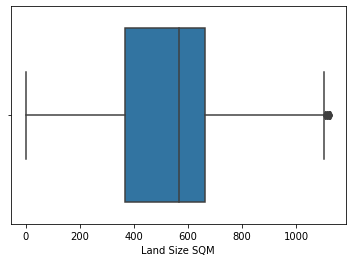

In [8]:
sns.boxplot(x=X["Land Size SQM"])

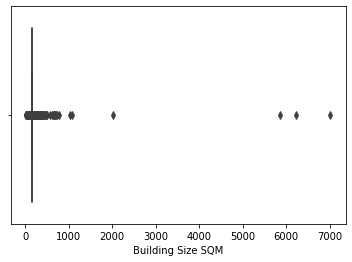

In [9]:
sns.boxplot(x=X["Building Size SQM"])

In [10]:
X = X.drop(["Building Size SQM"], axis = 1)

We will drop the column Building Size SQM because it contain a lot of outlier points

In [11]:
X = X[X["Toilets"] < 4]

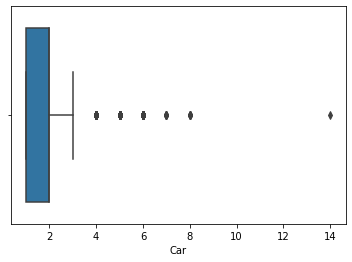

In [12]:
sns.boxplot(x=X["Car"])

In [13]:
X = X[X["Car"] < 4]

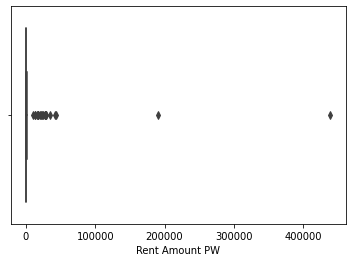

In [14]:
sns.boxplot(x=X["Rent Amount PW"])

In [15]:
Q1 = X["Rent Amount PW"].quantile(0.25)
Q3 = X["Rent Amount PW"].quantile(0.75)
IQR = Q3 - Q1

In [16]:
X = X[X["Rent Amount PW"] <= (Q3 + 1.5 * IQR)]

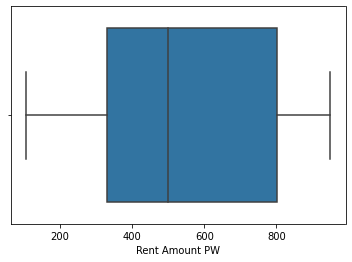

In [17]:
sns.boxplot(x=X["Rent Amount PW"])

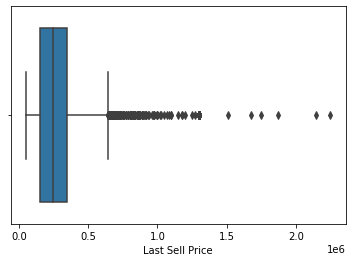

In [18]:
sns.boxplot(x=X["Last Sell Price"])

In [19]:
Q1 = X["Last Sell Price"].quantile(0.25)
Q3 = X["Last Sell Price"].quantile(0.75)
IQR = Q3 - Q1

In [20]:
X = X[X["Last Sell Price"] <= (Q3 + 1.5 * IQR)]

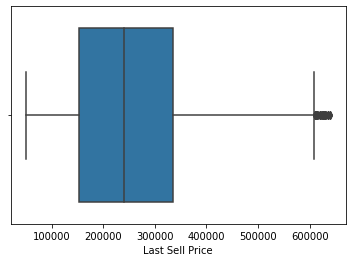

In [21]:
sns.boxplot(x=X["Last Sell Price"])

In [22]:
X

,Suburb,Land Size SQM,Bedrooms,Toilets,Car,School,Shop,Station,Park,Hospital,Rent Amount PW,Auction,Last Sell Price
0,Armstrong Creek,539.0,4.0,2.0,2.0,4,17,17,4,0,390.000000,0.0,175000.0
1,Armstrong Creek,446.0,4.0,2.0,2.0,5,9,14,3,0,800.847867,0.0,545000.0
2,Armstrong Creek,398.0,4.0,2.0,2.0,2,3,14,4,0,400.000000,0.0,550000.0
4,Armstrong Creek,449.0,4.0,2.0,2.0,1,2,12,3,0,800.847867,0.0,475000.0
5,Armstrong Creek,339.0,3.0,2.0,1.0,4,11,12,4,0,355.000000,0.0,438000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10932,Whittington,582.0,3.0,2.0,2.0,8,20,20,5,6,800.847867,0.0,206500.0
10935,Whittington,645.0,3.0,1.0,1.0,14,20,20,5,16,350.000000,0.0,178000.0
10937,Whittington,582.0,3.0,2.0,2.0,8,20,20,5,6,800.847867,0.0,206500.0
10940,Whittington,645.0,3.0,1.0,1.0,14,20,20,5,16,350.000000,0.0,178000.0


Address, land size, bedroom, car, rent amount , auction, last sell price

After remove the outliers, the dataset contain 9470 samples with 13 input features. because the feature "Suburb" is a category variable. Therefore, we apply to get dummies for this column.

In [23]:
#one hot encoding Suburb code
Suburbs = pd.get_dummies(X.Suburb)

In [24]:
y = y[X.index]

In [25]:
X = X.reset_index(drop = True)
Suburbs = Suburbs.reset_index(drop=True)

In [26]:
X = pd.concat([Suburbs, X.drop(["Suburb"], axis = 1)], axis= 1)

In [27]:
X.to_csv()

',Armstrong Creek,Bell Park,Bell Post Hill,Belmont,BreakWater,Corio,Drumcondra,East Geelong,Freshwater Creek,Geelong,Geelong West,Grovedale,Hamlyn Heights,Herne Hill,Highton,Lara,Manifold Heights,Marshall,Mount Duneed,Newcomb,Newtown,Norlane,North Geelong,North Shore,RippleSide,South Geelong,St Albans Park,Thomson,Wandana Heights,Waurn Ponds,Whittington,Land Size SQM,Bedrooms,Toilets,Car,School,Shop,Station,Park,Hospital,Rent Amount PW,Auction,Last Sell Price\n0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,539.0,4.0,2.0,2.0,4,17,17,4,0,390.0,0.0,175000.0\n1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,446.0,4.0,2.0,2.0,5,9,14,3,0,800.847867054994,0.0,545000.0\n2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,398.0,4.0,2.0,2.0,2,3,14,4,0,400.0,0.0,550000.0\n3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,449.0,4.0,2.0,2.0,1,2,12,3,0,800.847867054994,0.0,475000.0\n4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [28]:
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

# Split the whole data into the training set and test set

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [30]:
print(f"the number of sample in the train set is {X_train.shape[0]} sample")
print(f"the number of sample in the test set is {X_test.shape[0]} sample")

the number of sample in the train set is 7576 sample
the number of sample in the test set is 1894 sample


Variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias. Thus, to deal with this potential problem feature-wise standardized (μ=0, σ=1) is usually used prior to model fitting.

# Ridge Regression

In [56]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

tuned_params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
ridge_reg = GridSearchCV(Ridge(), tuned_params, scoring = 'neg_mean_absolute_error', cv=10, n_jobs=-1)

ridge_reg.fit(X_train, y_train)

print(ridge_reg.best_estimator_)
print(ridge_reg.best_score_)

Ridge(alpha=1000, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
-99420.317882369


In [57]:
ridge_reg.best_estimator_

Ridge(alpha=1000, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [58]:
## Predict Train results
y_train_pred = ridge_reg.predict(X_train)

In [59]:
## Predict Test results
y_pred =ridge_reg.predict(X_test)

In [55]:
from sklearn import metrics
print("Test Results for Ridge Regression:")
print("*******************************")
print(f"MAE: {metrics.mean_absolute_error(y_test, y_pred)}")
print(f"RMSE", metrics.mean_squared_error(y_test, y_pred, squared=False))

Test Results for Ridge Regression:
*******************************
MAE: 100768.38759050959
RMSE 156491.1162850053


# Linear Regression

In [94]:
from sklearn.linear_model import LinearRegression

In [95]:
lr = LinearRegression().fit(X_train, y_train)

In [96]:
y_pred = lr.predict(X_test)

In [98]:
print("Test Results for Linear Regression:")
print("*******************************")
print(f"MAE: {metrics.mean_absolute_error(y_test, y_pred)}")
print(f"RMSE", metrics.mean_squared_error(y_test, y_pred, squared=False))

Test Results for Linear Regression:
*******************************
MAE: 101494.6919945414
RMSE 156427.13049078305


# Lasso  Regression

In [91]:
from sklearn.linear_model import Lasso

tuned_params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
lasso_reg = GridSearchCV(Lasso(), tuned_params, scoring = 'neg_mean_absolute_error', cv=10, n_jobs=-1)

lasso_reg.fit(X_train, y_train)

print(lasso_reg.best_estimator_)
print(lasso_reg.best_score_)

Lasso(alpha=1000, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
-99878.31810500348


In [92]:
## Predict Test results
y_pred = lasso_reg.predict(X_test)

In [93]:
print("Test Results for Lasso Regression:")
print("*******************************")
print(f"MAE: {metrics.mean_absolute_error(y_test, y_pred)}")
print(f"RMSE", metrics.mean_squared_error(y_test, y_pred, squared=False))

Test Results for Lasso Regression:
*******************************
MAE: 101230.33124683991
RMSE 156261.5586924903


# Support Vector Regression

In [84]:
from sklearn.svm import SVR
tuned_params = {'C': [0.01, 0.1, 1, 10], 'gamma': [0.01, 0.1, 1, 10]}
model = GridSearchCV(SVR(), tuned_params, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=-1)
model.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10], 'gamma': [0.01, 0.1, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=0)

In [86]:
y_pred = model.predict(X_test)

In [87]:
print("Test Results for Support Vector Regression:")
print("*******************************")
print(f"MAE: {metrics.mean_absolute_error(y_test, y_pred)}")
print(f"RMSE", metrics.mean_squared_error(y_test, y_pred, squared=False))

Test Results for Support Vector Regression:
*******************************
MAE: 154914.720226398
RMSE 224286.0659028077


# RANDOM FOREST

In [126]:
from sklearn.tree import DecisionTreeRegressor
tuned_params = {'min_samples_split': [2, 3, 4, 5, 7], 'min_samples_leaf': [1, 2, 3, 4, 6], 'max_depth': [2, 3, 4, 5, 6, 7]}
model = RandomizedSearchCV(DecisionTreeRegressor(), tuned_params, n_iter=20, scoring = 'neg_mean_absolute_error', cv=10, n_jobs=-1)
model.fit(X_train, y_train)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   presort='deprecated',
                                                   random_state=None,
                                                   splitter='best'),
                   iid='

In [127]:
dt_model = DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [128]:
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [129]:
## Predict Test results
y_pred = dt_model.predict(X_test)
print(y_pred)

[ 317000.  365000.  228000. ... 1650000.  520000.  485000.]


In [130]:
print("Test Results for Decition tree Regression:")
print("*******************************")
print(f"MAE: {metrics.mean_absolute_error(y_test, y_pred)}")
print(f"RMSE", metrics.mean_squared_error(y_test, y_pred, squared=False))

Test Results for Decition tree Regression:
*******************************
MAE: 62481.82259767687
RMSE 140662.25653821797


# Comparison

In [131]:
algorithms = ["Deep Neural Network", "Linear Regression", "Ridge Regression", "Lasso Regression", "Support Vector Regression", "Decision Tree", "Decision Tree (T2 2020)"]
RMSEs = [108050, 156427, 156491, 156262, 224286, 140662, 204316]
colors = ["g", "g", "g", "g", "g", "g", "r"]

Text(0, 0.5, 'Dollar')

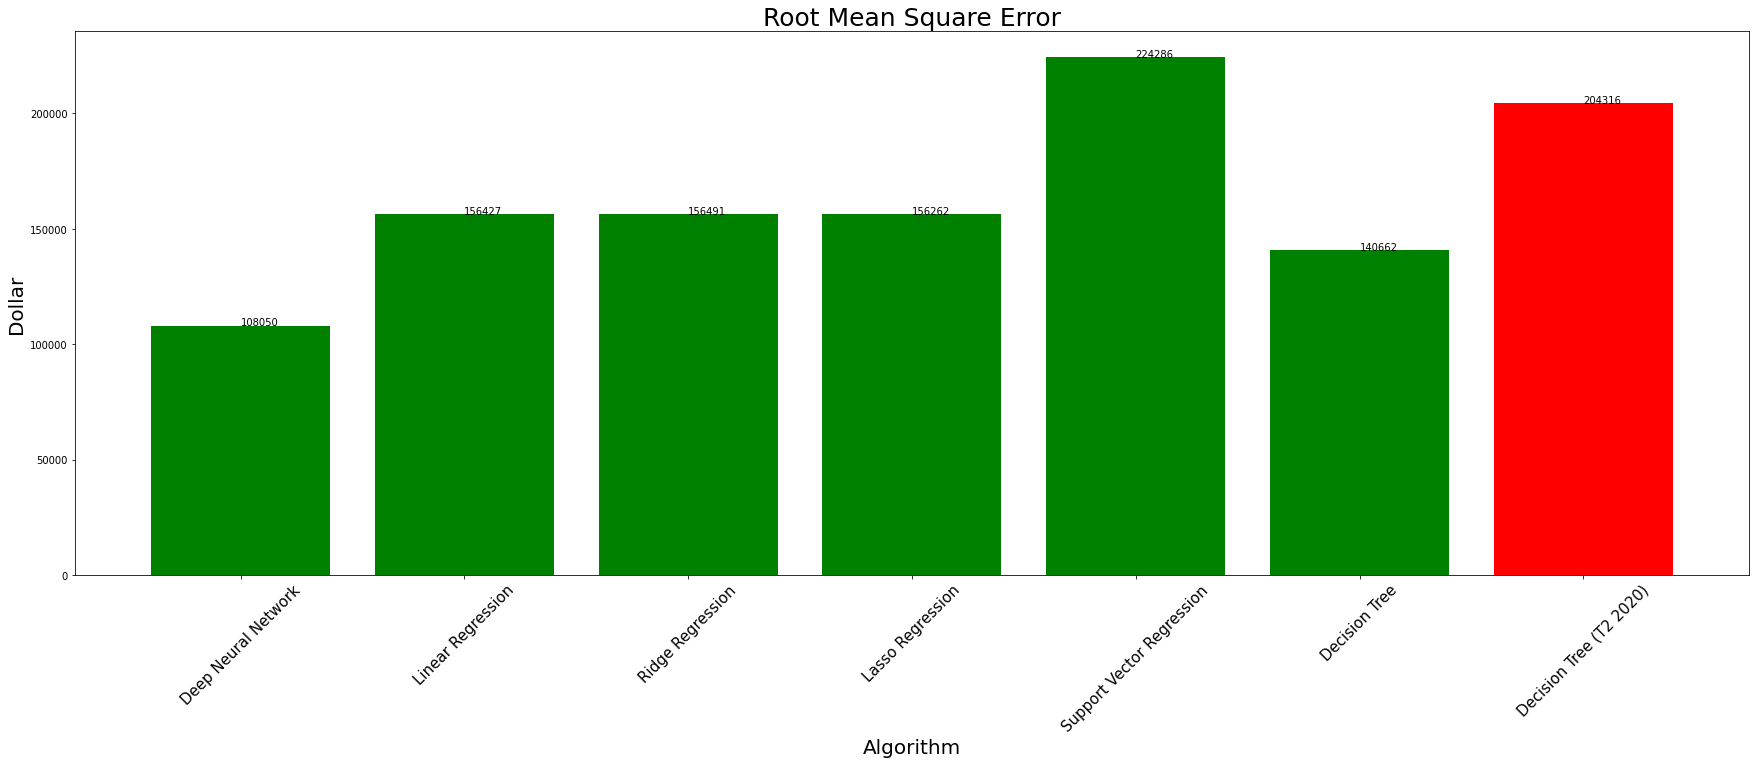

In [132]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
fig = plt.figure(figsize =(30,10))
plt.bar(algorithms, RMSEs,color = colors )
addlabels(algorithms, RMSEs)
plt.xticks( rotation=45, fontsize=15)
plt.title("Root Mean Square Error", fontsize=25)
plt.xlabel("Algorithm", fontsize=20)
plt.ylabel("Dollar", fontsize=20)

Accoding to the above bar chart, the are 6 algorithms (green bars) that are used to build the Real Estate model. the red one is the best model from T2 2020. it is clear that the Deep Neural Network reach the least error with only 109,000 dollars. The models Linear Regresion, Ridge Regression, Lasso Regression and Decition Tree reach about 150.000 dollars. On the other hand,  SVR is not the good model because the error of this model is very high with over 200,000 dollars. Overall speaking, Deep Neural Network is the best choice in this trimester. Comparing to the best model Decision Tree from T2 2020, Deep Reural Network reduces  about 50% error. It is clear that our model is better and can be used to predicti house prices in Geelong.